In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [42]:
#For mac
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device= "cpu"
print(f"Using device: {device}")

Using device: cpu


In [43]:
m=0.7
c=0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=m*X+c

In [44]:
split = int(len(X)*0.8)
X_train , y_train = X[:split],y[:split]
X_test, y_test = X[split:],y[split:]
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1])
torch.Size([10, 1]) torch.Size([10, 1])


In [45]:
def plot_data(X_train= X_train,y_train=y_train, X_test = X_test, y_test=y_test, predictions=None):
    plt.figure(figsize=(10,8))
    plt.scatter(X_train,y_train,c='b',s=10,label='Training Data')
    plt.scatter(X_test,y_test,c='r',s=10,label='Testing Data')
    if predictions is not None:
        plt.scatter(X_test,predictions,label="Predicted data")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title("Scatter Plot of X and y")

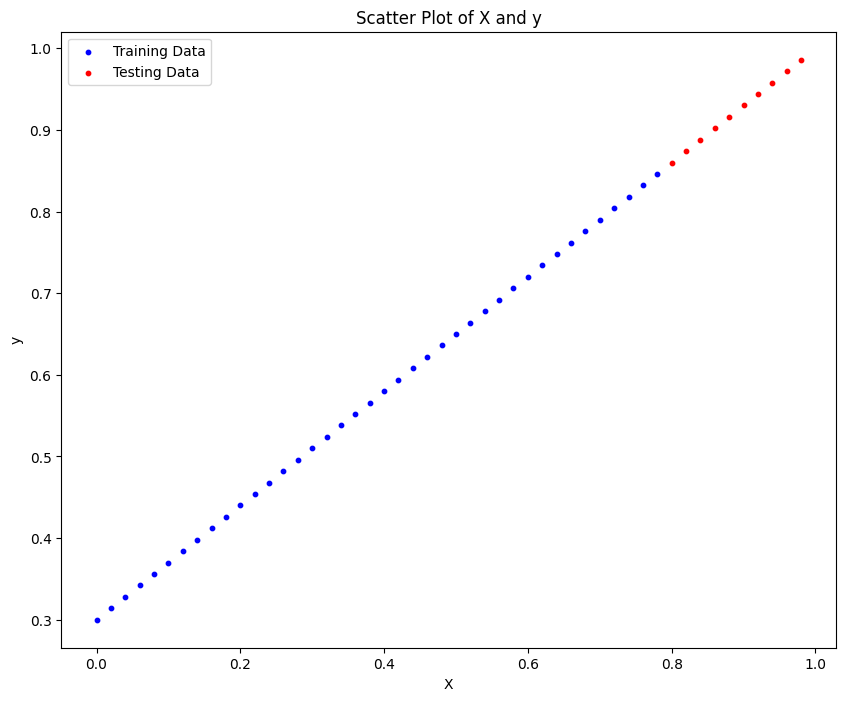

In [46]:
plot_data()

In [47]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias

        

In [48]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

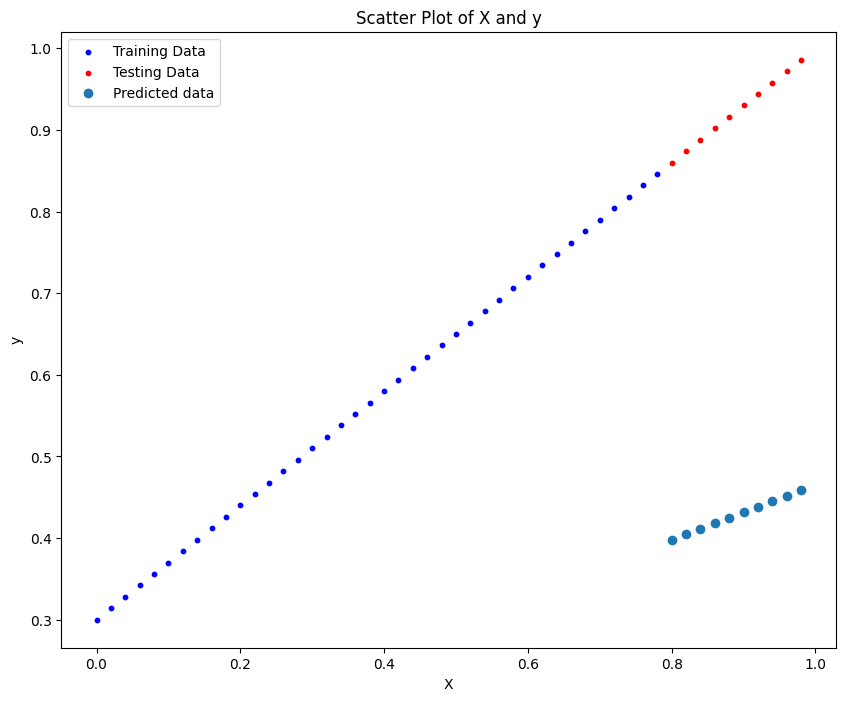

In [49]:
with torch.inference_mode():
    y_pred = model_0(X_test)

plot_data(predictions=y_pred)

In [50]:
#Set up loss funciton and optimizer 
loss_fn = nn.MSELoss()
optimizer= torch.optim.SGD(
    params = model_0.parameters(),lr=0.1
)

In [51]:
model_0.to(device)
next(model_0.parameters()),device

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 'cpu')

In [55]:
# Training loop
epochs= 500
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
trainLossList = []
testLossList = []
for epoch in range(epochs):
    ### Training
    model_0.train()

    #1. Forward Pass
    y_pred = model_0(X_train)

    #@ Calculate training loss
    loss = loss_fn(y_train,y_pred)

    #3 Zero grad optimizer
    optimizer.zero_grad()

    #4 Loss backward
    loss.backward()

    #5 step optimizer
    optimizer.step()

    ##testing
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fn(y_test, test_preds)

        if epoch % 10 ==0:
            print(f"Epoch: {epoch} | Training loss : {loss:.4f} | Test Loss: {loss:.4f}")
            
        trainLossList.append(loss)
        testLossList.append(test_loss)


Epoch: 0 | Training loss : 0.0386 | Test Loss: 0.0386
Epoch: 10 | Training loss : 0.0029 | Test Loss: 0.0029
Epoch: 20 | Training loss : 0.0023 | Test Loss: 0.0023
Epoch: 30 | Training loss : 0.0019 | Test Loss: 0.0019
Epoch: 40 | Training loss : 0.0016 | Test Loss: 0.0016
Epoch: 50 | Training loss : 0.0013 | Test Loss: 0.0013
Epoch: 60 | Training loss : 0.0011 | Test Loss: 0.0011
Epoch: 70 | Training loss : 0.0009 | Test Loss: 0.0009
Epoch: 80 | Training loss : 0.0007 | Test Loss: 0.0007
Epoch: 90 | Training loss : 0.0006 | Test Loss: 0.0006
Epoch: 100 | Training loss : 0.0005 | Test Loss: 0.0005
Epoch: 110 | Training loss : 0.0004 | Test Loss: 0.0004
Epoch: 120 | Training loss : 0.0004 | Test Loss: 0.0004
Epoch: 130 | Training loss : 0.0003 | Test Loss: 0.0003
Epoch: 140 | Training loss : 0.0002 | Test Loss: 0.0002
Epoch: 150 | Training loss : 0.0002 | Test Loss: 0.0002
Epoch: 160 | Training loss : 0.0002 | Test Loss: 0.0002
Epoch: 170 | Training loss : 0.0001 | Test Loss: 0.0001
Epo

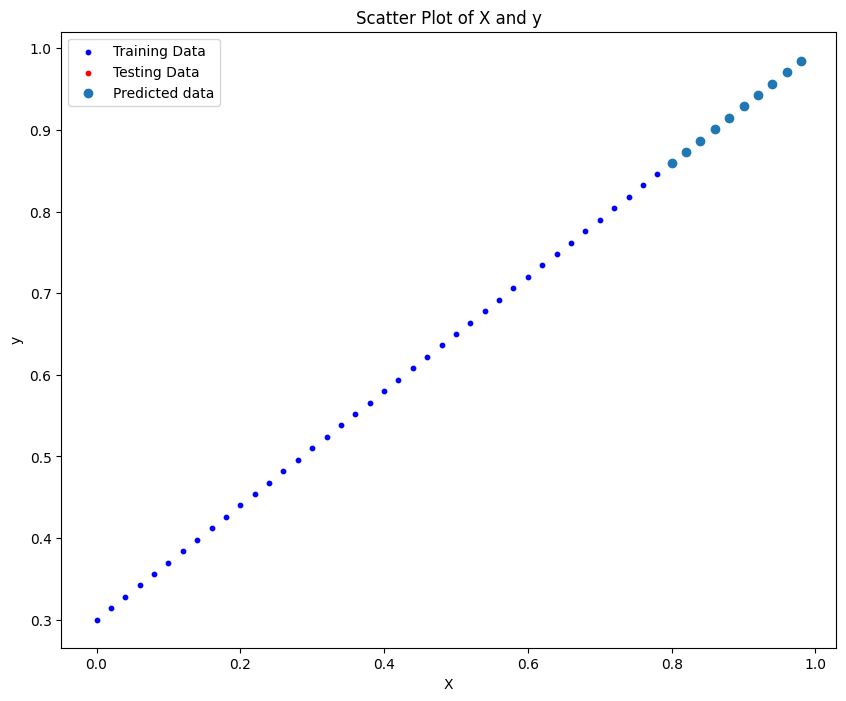

In [56]:
with torch.inference_mode():
    y_pred = model_0(X_test)

plot_data(predictions=y_pred)